### Part One - Autism Literature

First, download the SFARI gene list from https://gene.sfari.org/database/human-gene/

#### Task 1 - Plot a bar chart of the number of genes in each SFARI gene-score category (2 marks). 
#### Task 2 - Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1 (2 marks). 
#### Task 3 - For each of these genes find the number of papers in PubMed that include the gene AND are related to Autism (5 marks).
#### Task 4 - From these data fill a table with genes as rows and paper count by year as column (3 marks).
#### Task 5 - Plot a single stacked histogram displaying the data from the table (3 marks).
Comment on your results. You might want to think about the timescale over which papers have appeared, how different genes have fared over the years, how representative these 5 genes might be. Other factors to consider might be; how confident are you that the papers you have identified are related to Autism and why?
Possible extensions here might be to look at citation data, extend to more of the genes or even all of them.

### Task 1 - Plot a bar chart of the number of genes in each SFARI gene-score category (2 marks). 

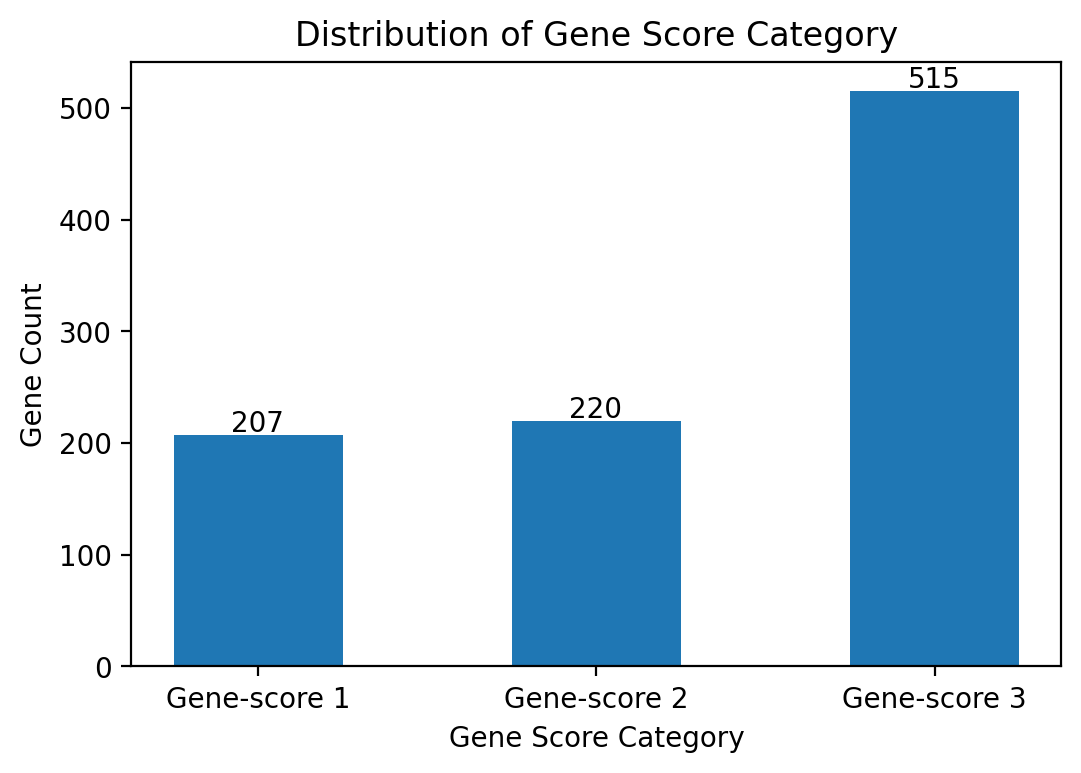

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("SFARI-Gene_genes_09-02-2021release_11-17-2021export.csv").sort_values(by=["gene-score"])

cat_1 = df.loc[df['gene-score'] == 1.0]
cat_2 = df.loc[df['gene-score'] == 2.0]
cat_3 = df.loc[df['gene-score'] == 3.0]
cat_NaN = df.loc[pd.isna(df['gene-score'])]

objects = ['Gene-score 1', 'Gene-score 2', 'Gene-score 3']
y_pos = np.arange(len(objects))
num_gene = [len(cat_1), len(cat_2), len(cat_3)]

plt.figure(dpi=200)
plt.bar(y_pos, num_gene, width=0.5)
plt.xticks(y_pos, objects)
plt.xlabel("Gene Score Category")
plt.ylabel("Gene Count")
plt.title("Distribution of Gene Score Category")
for i, j in enumerate(num_gene):
    plt.text(i-0.08, j+3, num_gene[i])
# plt.show()
plt.savefig("Distribution of Gene Score Category.png", dpi=200)

### Task 2 - Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1 (2 marks).

In [21]:
# comp_cat_1 = cat_1.sort_values(by=['number-of-reports'], ascending=False)
cat_1 = cat_1.sort_values(by=['number-of-reports'], ascending=False).head(20)
gene_name = cat_1["gene-name"]
cat_1

status gene-symbol                                          gene-name  \
596       9       NRXN1                                         neurexin 1   
812       9      SHANK3          SH3 and multiple ankyrin repeat domains 3   
510       9       MECP2                       Methyl CpG binding protein 2   
789       9       SCN2A  sodium channel, voltage-gated, type II, alpha ...   
780       9       SCN1A  sodium channel, voltage-gated, type I, alpha s...   
159       9        CHD8        chromodomain helicase DNA binding protein 8   
725       9        PTEN  phosphatase and tensin homolog (mutated in mul...   
888       9     SYNGAP1           synaptic Ras GTPase activating protein 1   
375       9      GRIN2B  glutamate receptor, inotropic, N-methyl D-apar...   
52        9      ARID1B                      AT-rich interaction domain 1B   
756       9        RELN                                             Reelin   
156       9        CHD2        Chromodomain helicase DNA binding protein 2   
274       9      DYRK1A  Dual-specificity tyrosine-(Y)-phosphorylation ...   
906       9        TCF4                             Transcription factor 4   
14        9        ADNP         Activity-dependent neuroprotector homeobox   
316       9       FOXP1                                    forkhead box P1   
36        9     ANKRD11                           ankyrin repeat domain 11   
872       9      STXBP1                         Syntaxin binding protein 1   
99        9     CACNA1C  calcium channel, voltage-dependent, L type, al...   
314       9        FMR1                     fragile X mental retardation 1   

          ensembl-id chromosome  \
596  ENSG00000179915          2   
812  ENSG00000251322         22   
510  ENSG00000169057          X   
789  ENSG00000136531          2   
780  ENSG00000144285          2   
159  ENSG00000100888         14   
725  ENSG00000171862         10   
888  ENSG00000197283          6   
375  ENSG00000273079         12   
52   ENSG00000049618          6   
756  ENSG00000189056          7   
156  ENSG00000173575         15   
274  ENSG00000157540         21   
906  ENSG00000196628         18   
14   ENSG00000101126         20   
316  ENSG00000114861          3   
36   ENSG00000167522         16   
872  ENSG00000136854          9   
99   ENSG00000151067         12   
314  ENSG00000102081          X   

                                      genetic-category  gene-score  syndromic  \
596  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          0   
812  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
510   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
789               Rare Single Gene Mutation, Syndromic         1.0          0   
780  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
159   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
725   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
888   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
375  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          0   
52    Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
756  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          0   
156               Rare Single Gene Mutation, Syndromic         1.0          1   
274   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
906  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
14                Rare Single Gene Mutation, Syndromic         1.0          1   
316  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
36                Rare Single Gene Mutation, Syndromic         1.0          1   
872   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
99   Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
314  Rare 

### Task 3 - For each of these genes find the number of papers in PubMed that include the gene AND are related to Autism (5 marks).

In [22]:
from Bio import Entrez

Entrez.email = "A.N.Other@example.com" # You should replace this with your e-mail address 

def get_pubmed(row):
    term_1 = row['gene-symbol']
    term_2 = row['gene-name']
    terms = f"[(autism spectrum disorder[MeSH Terms]) AND (({term_1}) OR ({term_2}))]"
    year_counts = {"Gene_Name":row['gene-symbol']}
# note the egquery function provides Entrez database counts from a global search.
    for i in range(2000,2022,1):
        handle = Entrez.egquery(term=str(i)+terms)
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                year_counts[i] = int(row["Count"])
    
    return [year_counts]

df = pd.concat([pd.DataFrame(get_pubmed(cat_1.iloc[i,:])) for i in range(20)],
          ignore_index=True)
print(df)

   Gene_Name  2000  2001  2002  2003  2004  2005  2006  2007  2008  ...  2012  \
0      NRXN1     0     0     0     0     1     2     1     6     8  ...     8   
1     SHANK3     0     0     0     0     0     1     1     4     6  ...     7   
2      MECP2     2     1     2     7     4     8     5     8    11  ...     8   
3      SCN2A     0     0     0     1     2     0     0     0     2  ...     1   
4      SCN1A     0     0     0     1     2     2     1     0     2  ...     4   
5       CHD8     1     0     0     0     0     0     0     0     0  ...     3   
6       PTEN     0     1     0     0     0     4     5     5     3  ...     4   
7    SYNGAP1     0     0     0     0     0     0     0     0     0  ...     2   
8     GRIN2B     0     0     0     0     0     0     0     0     0  ...     2   
9     ARID1B     0     0     0     0     0     0     0     0     0  ...     1   
10      RELN     1     5     6     4     6     7     2     6     5  ...     5   
11      CHD2     0     0    

##### Search Keywords
1. (autism spectrum disorder[MeSH Terms]) AND ((NRXN1) OR (neurexin 1))
2. (autism spectrum disorder[MeSH Terms]) AND ((SHANK3) OR (SH3 and multiple ankyrin repeat domains))
3. (autism spectrum disorder[MeSH Terms]) AND ((MECP2) OR (Methyl CpG binding protein 2))
4. (autism spectrum disorder[MeSH Terms]) AND ((SCN2A) OR (sodium channel, voltage-gated, type II, alpha subunit))
5. (autism spectrum disorder[MeSH Terms]) AND ((SCN1A) OR (sodium channel, voltage-gated, type I, alpha subunit))

### Task4 - From these data fill a table with genes as rows and paper count by year as column (3 marks).

In [23]:
df.to_csv("20_top_genes_pubmed.csv")

### Task 5 - Plot a single stacked histogram displaying the data from the table (3 marks).

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

pbmd = pd.read_csv("20_top_genes_pubmed.csv", index_col=0)

n_bins = np.arange(len(pbmd.columns)-1)


plt.figure(figsize=(15,10), dpi=1200)
# color=iter(cm.tab20(np.linspace(0,1,20)))
accum = 0
for i in range(5):
#     c=next(color)
    plt.bar(n_bins, pbmd.iloc[i][1:].to_numpy(), 
            width=1, label = pbmd.iloc[i].iloc[0], bottom = accum, align='edge')
    accum += pbmd.iloc[i][1:]
plt.xlabel('Year')
plt.ylabel('Total Counts')
plt.title('PubMed Papers Counts')
plt.legend()
plt.xticks(n_bins, pbmd.columns[1:].to_numpy())
# plt.show()
plt.savefig("top5_Stacked Histogram.png", dpi=1200)

### Citations Searching

In [28]:
from Bio import Entrez

Entrez.email = "A.N.Other@example.com"
#====================================================================================
def get_pubmed_id(row):
    
    term_1 = row['gene-symbol']
    term_2 = row['gene-name']
    terms = f"[(autism spectrum disorder[MeSH Terms]) AND (({term_1}) OR ({term_2}))]"
    year_counts = {"Gene_Name":row['gene-name']}
    
    data = {"Gene_Name": row['gene-symbol']}
    
    for i in range(2000,2022,1):
        handle = Entrez.esearch(db='pubmed', term=str(i)+terms)
        record = Entrez.read(handle)
        handle.close()
        data[str(i)] = record['IdList']
        
    return data
#====================================================================================
def get_citation(idlist):
    
    for key, values in idlist.items():
        num = 0
        if key == "Gene_Name":
            continue
        for pmid in values:
            results = Entrez.read(Entrez.elink(dbfrom="pubmed", db="pmc",
                                    LinkName="pubmed_pmc_refs", id=pmid))
            try:
                pmc_ids = [link["Id"] for link in results[0]["LinkSetDb"][0]["Link"]]
                results2 = Entrez.read(Entrez.elink(dbfrom="pmc", db="pubmed", LinkName="pmc_pubmed",
                                    id=",".join(pmc_ids)))
                pubmed_ids = [link["Id"] for link in results[0]["LinkSetDb"][0]["Link"]]
                num += len(pubmed_ids)
            except IndexError:
                num += 0
        idlist[key] = num
        
    return [idlist]
#===================================================================================

In [29]:
df_citation_num = pd.concat([pd.DataFrame(get_citation(get_pubmed_id(cat_1.iloc[i,:]))) for i in range(20)], ignore_index=True)
print(df_citation_num)

   Gene_Name  2000  2001  2002  2003  2004  2005  2006  2007  2008  ...  2012  \
0      NRXN1     0     0     0     0    91   133   129   460  1913  ...   317   
1     SHANK3     0     0     0     0     0    41   583   948   924  ...   742   
2      MECP2    86     8    24   666   468   310   199   204   312  ...   148   
3      SCN2A     0     0     0   101    70     0     0     0    57  ...   867   
4      SCN1A     0     0     0   101    70     0     0     0     3  ...  2050   
5       CHD8     3     0     0     0     0     0     0     0     0  ...  2001   
6       PTEN     0    88     0     0     0   501   478   421   188  ...   107   
7    SYNGAP1     0     0     0     0     0     0     0     0     0  ...    98   
8     GRIN2B     0     0     0     0     0     0     0     0     0  ...  1193   
9     ARID1B     0     0     0     0     0     0     0     0     0  ...    59   
10      RELN     1   190   124   323   307   299   154   477   343  ...   339   
11      CHD2     0     0    

In [30]:
df_citation_num.to_csv("Citation Number.csv")

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

pbmd = pd.read_csv("Citation Number.csv", index_col=0)
n_bins = np.arange(len(pbmd['Gene_Name']))
plt.figure(figsize=(15,10), dpi=1200)
color=iter(cm.tab20(np.linspace(0,1,22)))
accum = 0

for i in range(22):
    c=next(color)
    plt.bar(n_bins, pbmd.iloc[:,i+1].to_numpy(), 
            width=0.6, label = pbmd.columns[i+1], bottom = accum, align='center', color=c)    
    accum += pbmd.iloc[:,i+1].to_numpy()
    
plt.xlabel('Gene Name')
plt.ylabel('Total Citation Counts')
plt.title('Citation Counts')
plt.legend()
plt.xticks(n_bins, pbmd.iloc[:,0],rotation=45)
plt.savefig("Citation bar")

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

pbmd = pd.read_csv("Citation Number.csv", index_col=0)

n_bins = np.arange(len(pbmd.columns)-1)

plt.figure(figsize=(15,10), dpi=1200)

color=iter(cm.tab20(np.linspace(0,1,20)))
accum = 0

for i in range(20):
    c=next(color)
    plt.bar(n_bins, pbmd.iloc[i][1:].to_numpy(), 
            width=1, label = pbmd.iloc[i].iloc[0], bottom = accum, align='edge', color=c)
    accum += pbmd.iloc[i][1:]
    
plt.xlabel('Year')
plt.ylabel('Total Citation Counts')
plt.title('Citation Counts')
plt.legend()
plt.xticks(n_bins, pbmd.columns[1:].to_numpy())

plt.savefig("Citation Stacked Histogram.png", dpi=1200)

### Part Two - Autism Genes

Next we want to look at some of the functional terms that have been annotated to SFARI genes separating them out by their gene-score.

#### Task 1 – Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier) (2 marks).
#### Task 2 – Using the gene2go file from NCBI that we worked with in week 8 find the Gene Ontology terms that have been annotated to all of the SFARI genes (4marks).
#### Task 3 – Now split the genes up into three lists by their SFARI gene-score (1 mark).
#### Task 4 – Create tables of the 10 most commonly annotated terms for each gene list. The tables should have the following columns: GO term ID, GO term Description, GO term count (3 marks).
#### Task 5 – Take the three lists of UIDs created above and use the PantherDB tool - http://pantherdb.org/ to perform a “Functional classification viewed in graphic charts” analysis reporting and select the “Bar chart” display option, using default settings. Once on the results page displaying the bar chart use the pull-down menu to change the ontology to “Biological Process”. Click the small (!) “export” button to download the results as a text file and us this to make your own bar chart (5 marks).


*Compare and contrast your results from Tasks 4 and 5 and any differences you find between the gene lists from the different gene-score categories in the SFARI gene lists. What can you say about Autism genes based on the results from these analyses?*

*Possible extensions here might be to explore other pathway analysis tools and websites such as KEGG and Reactome. You could also chose to perform a statistical analysis directly on the results from Task 4.*

### Task 1 – Map the gene-symbol for every gene in the SFARI gene list to an NCBI UID (unique Entrez Gene identifier) (2 marks).

In [2]:
import pandas as pd
from Bio import Entrez
Entrez.email = "me@helloworld.com"

df = pd.read_csv("SFARI-Gene_genes_09-02-2021release_11-17-2021export.csv")
df['uid']=""

for i in range(len(df['gene-symbol'])):
    term = f"{df['gene-symbol'][i]}[Gene Name] AND Homo Sapiens[Organism]"
    handle = Entrez.esearch(db='Gene', term=term)
    record = Entrez.read(handle)
    try:
        df.loc[i, 'uid']=int(record['IdList'][0])
    except IndexError:
        try:
            handle = Entrez.esearch(db='Gene', term=f"{df['gene-symbol'][i]}")
            record = Entrez.read(handle)
            df.loc[i, 'uid']=int(record['IdList'][0])
        except IndexError:
            df.loc[i, 'uid']="Not Found"
print(df)
df.to_csv('df_uid.csv')

      status gene-symbol                                          gene-name  \
0          9        ABAT                   4-aminobutyrate aminotransferase   
1          9      ABCA10  ATP-binding cassette, sub-family A (ABC1), mem...   
2          9      ABCA13         ATP binding cassette subfamily A member 13   
3          9       ABCA7  ATP-binding cassette, sub-family A (ABC1), mem...   
4          9         ACE                    angiotensin I converting enzyme   
...      ...         ...                                                ...   
1018       9       ZMYM2                  zinc finger MYM-type containing 2   
1019       9      ZMYND8                 zinc finger MYND-type containing 8   
1020       9      ZNF827                            Zinc finger protein 827   
1021       9      ZSWIM6                 zinc finger SWIM-type containing 6   
1022       9      ZWILCH                          zwilchkinetochore protein   

           ensembl-id chromosome  \
0     ENSG00000

### Task 2 – Using the gene2go file from NCBI that we worked with in week 8 find the Gene Ontology terms that have been annotated to all of the SFARI genes (4marks).

In [14]:
import pandas as pd

gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')
gene2go['GeneID'] = gene2go['GeneID'].astype('string')

sfari_gene_uid = pd.read_csv("df_uid.csv").rename(columns={'uid':"GeneID"})
mapped_gene2go = gene2go.merge(sfari_gene_uid[['GeneID', 'gene-symbol','gene-score']], on=['GeneID'], how="inner")
print(mapped_gene2go)
mapped_gene2go.to_csv('mapped_gene2go.csv', index=False)

       #tax_id     GeneID       GO_ID Evidence       Qualifier  \
0         9606         18  GO:0001666      IEA     involved_in   
1         9606         18  GO:0003867      IDA  contributes_to   
2         9606         18  GO:0005739      IBA    is_active_in   
3         9606         18  GO:0005739      IDA      located_in   
4         9606         18  GO:0005739      ISS      located_in   
...        ...        ...         ...      ...             ...   
27707     9606  100996717  GO:0005515      IPI         enables   
27708     9606  100996717  GO:0005576      IDA      located_in   
27709     9606  100996717  GO:0007219      IEA     involved_in   
27710     9606  100996717  GO:0021987      IDA     involved_in   
27711     9606  100996717  GO:0045747      IDA     involved_in   

                                              GO_term             PubMed  \
0                                 response to hypoxia                  -   
1               4-aminobutyrate transaminase activity  

### Task 3 – Now split the genes up into three lists by their SFARI gene-score (1 mark).

In [3]:
import pandas as pd
mapped_gene2go = pd.read_csv('mapped_gene2go.csv')
mapped_gene2go.loc[(mapped_gene2go['gene-score']==1.0) & (mapped_gene2go['Category']=="Process")].to_csv("TEST.csv")

In [19]:
import pandas as pd

complete_df = pd.read_csv('mapped_gene2go.csv')
complete_df.loc[complete_df['gene-score']==3.0].to_csv("df_3.csv", index=False)
complete_df.loc[complete_df['gene-score']==2.0].to_csv("df_2.csv", index=False)
complete_df.loc[complete_df['gene-score']==1.0].to_csv("df_1.csv", index=False)

pd.read_csv("df_3.csv")

#tax_id     GeneID       GO_ID Evidence       Qualifier  \
0         9606         18  GO:0001666      IEA     involved_in   
1         9606         18  GO:0003867      IDA  contributes_to   
2         9606         18  GO:0005739      IBA    is_active_in   
3         9606         18  GO:0005739      IDA      located_in   
4         9606         18  GO:0005739      ISS      located_in   
...        ...        ...         ...      ...             ...   
12576     9606  100996717  GO:0005515      IPI         enables   
12577     9606  100996717  GO:0005576      IDA      located_in   
12578     9606  100996717  GO:0007219      IEA     involved_in   
12579     9606  100996717  GO:0021987      IDA     involved_in   
12580     9606  100996717  GO:0045747      IDA     involved_in   

                                              GO_term             PubMed  \
0                                 response to hypoxia                  -   
1               4-aminobutyrate transaminase activity           15528998   
2                                       mitochondrion           21873635   
3                                       mitochondrion                  -   
4                                       mitochondrion                  -   
...                                               ...                ...   
12576                                 protein binding  29856954|32296183   
12577                            extracellular region           29856954   
12578                         Notch signaling pathway                  -   
12579                     cerebral cortex development  29561261|29856954   
12580  positive regulation of Notch signaling pathway           29856954   

        Category gene-symbol  gene-score  
0        Process        ABAT         3.0  
1       Function        ABAT         3.0  
2      Component        ABAT         3.0  
3      Component        ABAT         3.0  
4      Component        ABAT         3.0  
...          ...         ...         ...  
12576   Function    NOTCH2NL         3.0  
12577  Component    NOTCH2NL         3.0  
12578    Process    NOTCH2NL         3.0  
12579    Process    NOTCH2NL         3.0  
12580    Process    NOTCH2NL         3.0  

[12581 rows x 10 columns]

### Task 4 – Create tables of the 10 most commonly annotated terms for each gene list. The tables should have the following columns: GO term ID, GO term Description, GO term count (3 marks).¶

In [1]:
import pandas as pd

'''GO terms in all the three categories'''

mapped_gene2go = pd.read_csv('mapped_gene2go.csv')

mapped_score_1 = mapped_gene2go.loc[mapped_gene2go['gene-score']==1.0]
mapped_score_1[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_1_top10.csv')

mapped_score_2 = mapped_gene2go.loc[mapped_gene2go['gene-score']==2.0]
mapped_score_2[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_2_top10.csv')

mapped_score_3 = mapped_gene2go.loc[mapped_gene2go['gene-score']==3.0]
mapped_score_3[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_3_top10.csv')

In [104]:
import pandas as pd

'''GO terms from biological process categories'''

mapped_gene2go = pd.read_csv('mapped_gene2go.csv')

mapped_score_1 = mapped_gene2go.loc[(mapped_gene2go['gene-score']==1.0) & (mapped_gene2go['Category']=='Process')]
mapped_score_1[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_1_top10_process.csv')

mapped_score_2 = mapped_gene2go.loc[(mapped_gene2go['gene-score']==2.0) & (mapped_gene2go['Category']=='Process')]
mapped_score_2[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_2_top10_process.csv')

mapped_score_3 = mapped_gene2go.loc[(mapped_gene2go['gene-score']==3.0) & (mapped_gene2go['Category']=='Process')]
mapped_score_3[['GO_ID','GO_term']].value_counts().head(10).to_csv('score_3_top10_process.csv')

### Task 5 – Take the three lists of UIDs created above and use the PantherDB tool - http://pantherdb.org/ to perform a “Functional classification viewed in graphic charts” analysis reporting and select the “Bar chart” display option, using default settings. Once on the results page displaying the bar chart use the pull-down menu to change the ontology to “Biological Process”. Click the small (!) “export” button to download the results as a text file and us this to make your own bar chart (5 marks).

In [22]:
panther_1 = pd.read_csv("score1.csv").drop(columns='field1').sort_values(by='field3', ascending=False)
panther_2 = pd.read_csv("score2.csv").drop(columns='field1').sort_values(by='field3', ascending=False)
panther_3 = pd.read_csv("score3.csv").drop(columns='field1').sort_values(by='field3', ascending=False)

In [138]:
import numpy as np
def show_values(axs, space=.01):
    def _single(ax):
        for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
    
def bar_plot(score, df):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Patch
    
    # create a color palette the length of the dataframe
    colors = sns.color_palette('husl', n_colors=len(df))
    # plot
    sns.set(rc={'figure.figsize':(15,10)})
    p = sns.barplot(x='field3', y='field2', data=df, palette=colors, orient='h')
    # create color map with colors and df.names
    cmap = dict(zip(df.field2, colors))
    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]
    
    plt.title(f"Gene Score {score} Gene Ontology Classification", size=15)
    p.set_yticklabels(df['field2'], size = 15)
    p.set_xticklabels(p.get_xticks().astype(int), size = 15)
    plt.ylabel("Categories", fontsize = 15)
    plt.xlabel('Counts', fontsize = 15)
    show_values(p)
#     plt.xticks(df.index, "")
#     plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, prop={'size': 16})
#     plt.tight_layout()
#     plt.savefig(f"panther_{score}.png", dpi=1200)
    plt.show()

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_3402/4028704182.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks().astype(int), size = 15)


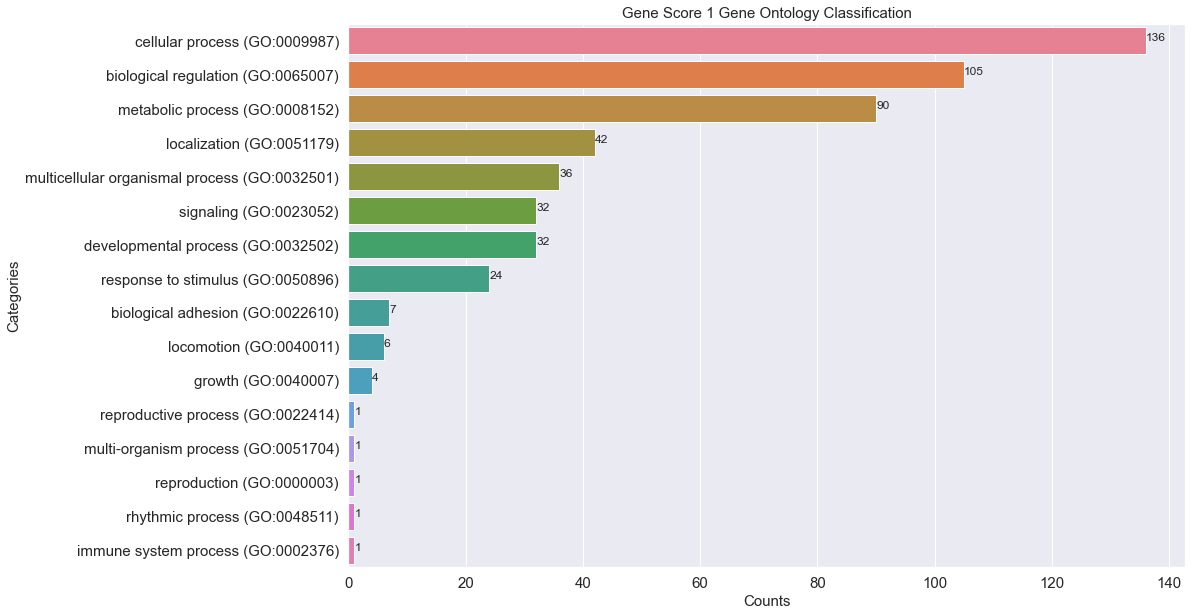

In [139]:
bar_plot(1, panther_1)

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_3402/4028704182.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks().astype(int), size = 15)


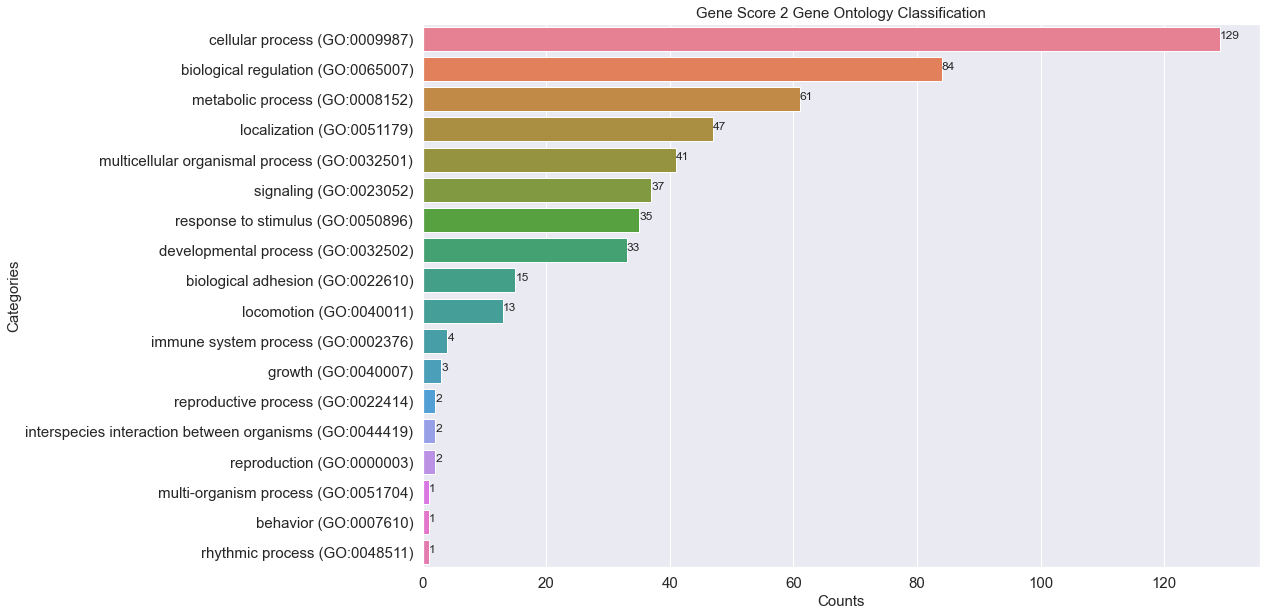

In [140]:
bar_plot(2, panther_2)

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_3402/4028704182.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks().astype(int), size = 15)


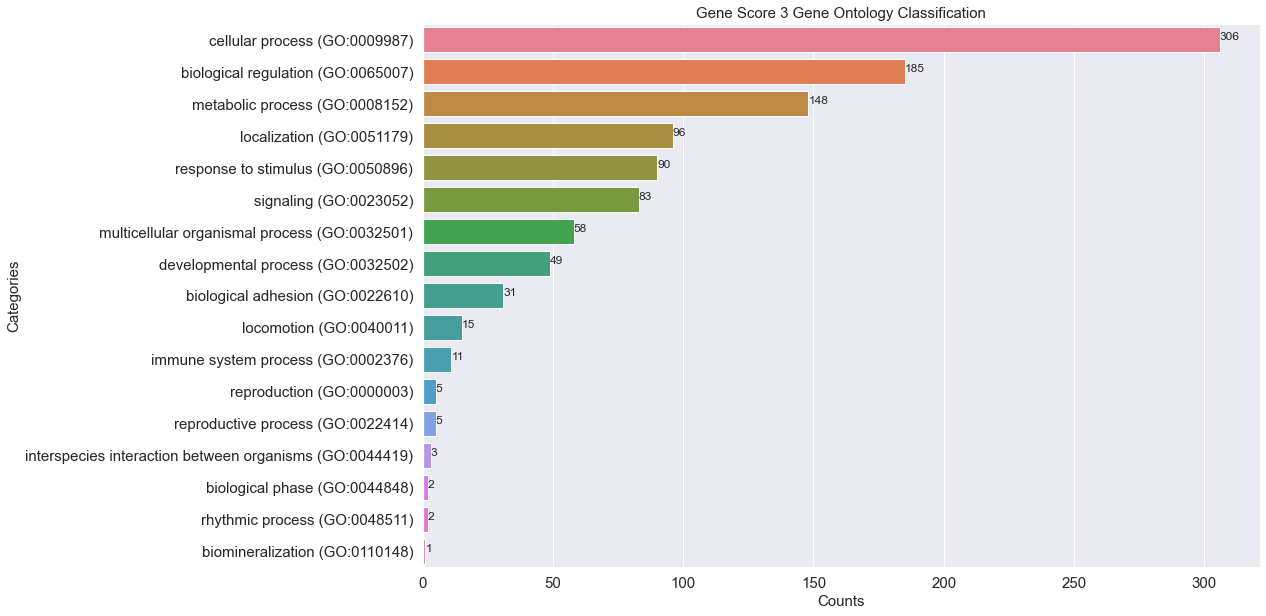

In [141]:
bar_plot(3, panther_3)

## David Data Analysis

In [110]:
import pandas as pd

david_1 = pd.read_csv('David_GO_Score_1.csv')[['Term', 'Count']].sort_values(by=['Count'], ascending=False).head(10)

david_1.to_csv('david_1_top_10.csv', index=False)

In [111]:
david_2 = pd.read_csv('David_GO_Score_2.csv')[['Term', 'Count']].sort_values(by=['Count'], ascending=False).head(10)

david_2.to_csv('david_2_top_10.csv', index=False)

In [112]:
david_3 = pd.read_csv('David_GO_Score_3.csv')[['Term', 'Count']].sort_values(by=['Count'], ascending=False).head(10)

david_3.to_csv('david_3_top_10.csv', index=False)

### KEGG Pathway

Text(0.5, 1.0, 'Kegg Pathway --- Gene Score 1')

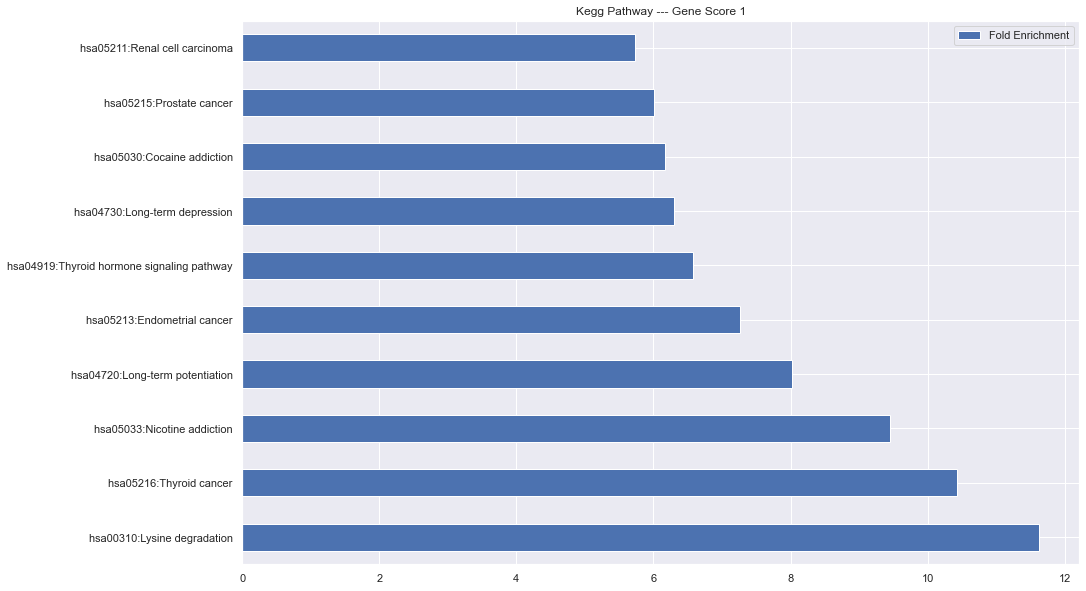

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
kegg_1 = pd.read_csv('David_KEGG_1.csv')[['Term', 'Fold Enrichment']].sort_values(by=['Fold Enrichment'], ascending=False).head(10)

p = kegg_1.plot.barh()
p.set_yticklabels(kegg_1['Term'])
p.set_title("Kegg Pathway --- Gene Score 1")
# plt.tight_layout()

[Text(0, 0, 'hsa05033:Nicotine addiction'),
 Text(0, 1, 'hsa04724:Glutamatergic synapse'),
 Text(0, 2, 'hsa04713:Circadian entrainment'),
 Text(0, 3, 'hsa05031:Amphetamine addiction'),
 Text(0, 4, 'hsa04720:Long-term potentiation'),
 Text(0, 5, 'hsa04925:Aldosterone synthesis and secretion'),
 Text(0, 6, 'hsa04723:Retrograde endocannabinoid signaling'),
 Text(0, 7, 'hsa04020:Calcium signaling pathway'),
 Text(0, 8, 'hsa04725:Cholinergic synapse'),
 Text(0, 9, 'hsa05230:Central carbon metabolism in cancer')]

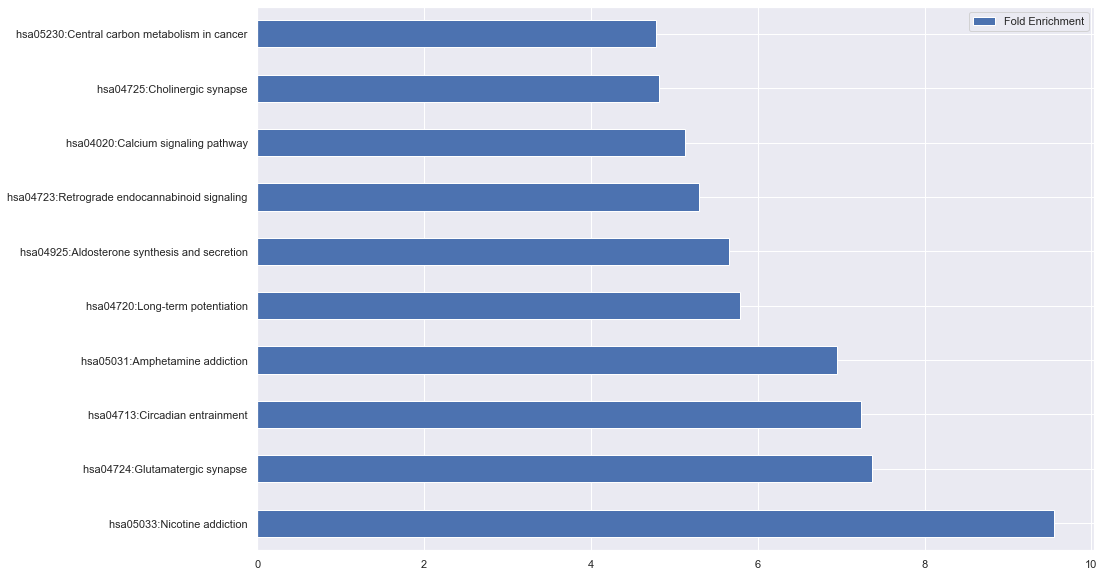

In [132]:
kegg_2 = pd.read_csv('David_KEGG_2.csv')[['Term', 'Fold Enrichment']].sort_values(by=['Fold Enrichment'], ascending=False).head(10)

p2 = kegg_2.plot.barh()
p2.set_yticklabels(kegg_2['Term'])

[Text(0, 0, 'hsa05332:Graft-versus-host disease'),
 Text(0, 1, 'hsa05031:Amphetamine addiction'),
 Text(0, 2, 'hsa04960:Aldosterone-regulated sodium reabsorption'),
 Text(0, 3, 'hsa05030:Cocaine addiction'),
 Text(0, 4, 'hsa04710:Circadian rhythm'),
 Text(0, 5, 'hsa04924:Renin secretion'),
 Text(0, 6, 'hsa04911:Insulin secretion'),
 Text(0, 7, 'hsa04340:Hedgehog signaling pathway'),
 Text(0, 8, 'hsa04726:Serotonergic synapse'),
 Text(0, 9, 'hsa04970:Salivary secretion')]

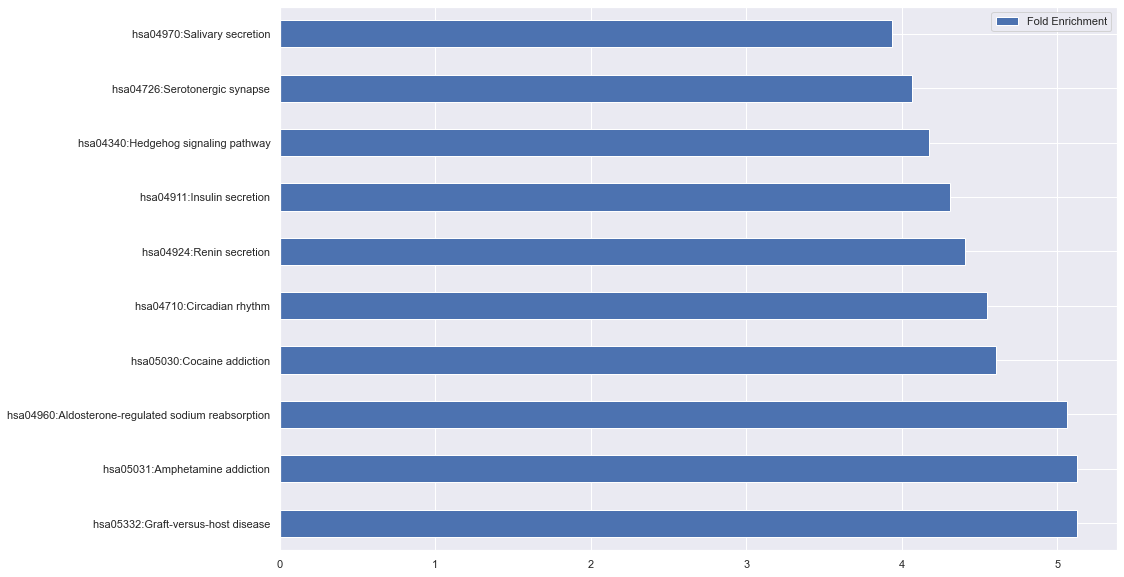

In [133]:
kegg_3 = pd.read_csv('David_KEGG_3.csv')[['Term', 'Fold Enrichment']].sort_values(by=['Fold Enrichment'], ascending=False).head(10)

p3 = kegg_3.plot.barh()
p3.set_yticklabels(kegg_3['Term'])

### Part Three - Autism Networks

We now want to see if there’s any evidence that these proteins work together. One way to look at this is to look at whether any of their proteins physically interact in a co-ordinated way. To assess this, you will now do some basic network analysis on protein-protein interaction data.

#### Task 1 – Create a plain text file of the NCBI UIDs for all of the gene-score 1 SFARI genes. Then, using the STRING website (https://string-db.org/) upload the gene-score 1 gene list, select “homo sapiens” as the species and hit search then click continue to visualise the protein-protein interaction network. In this network the genes are the nodes and the interactions between them the edges (connections). Click the “analysis” option near the bottom and report the following statistics: “number of nodes”, “number of edges” and “average node degree” (3 marks).
#### Task 2 – Click the “cluster” option and select “MCL clustering” with the default option. Download the “MCL clusters in TSV format” file. From this, find the two biggest clusters produced by the MCL clustering and use the PantherDB tool as in Part Two to analyse the function of genes in these clusters. This time instead of selecting “Biological Process” ontology use the “Pathway” ontology (6 marks).
#### Task 3 – Click the “exports” option and download the network as a “bitmap image” file (1 mark).
Compare and contrast your results from the two clusters above, commenting on the functional differences highlighted by the Panther tool. Also, compare back to your findings from Part Two.

Possible extensions would be to repeat these analyses with other gene-score restricted lists and with them all combined. Also, using other ontologies with the Panther tool to explore cluster functions.

In [11]:
import pandas as pd

complete_df = pd.read_csv('df_uid-Copy1.csv')

score_1_uid = complete_df.loc[complete_df['gene-score']==1.0]['uid']

score_1_uid.to_csv("score_1_uid.csv", index = None, header = False)

In [12]:
import pandas as pd

complete_df = pd.read_csv('df_uid-Copy1.csv')

score_2_uid = complete_df.loc[complete_df['gene-score']==2.0]['uid']

score_2_uid.to_csv("score_2_uid.csv", index = None, header = False)

In [13]:
import pandas as pd

complete_df = pd.read_csv('df_uid-Copy1.csv')

score_3_uid = complete_df.loc[complete_df['gene-score']==3.0]['uid']

score_3_uid.to_csv("score_3_uid.csv", index = None, header = False)

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/166694026.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)


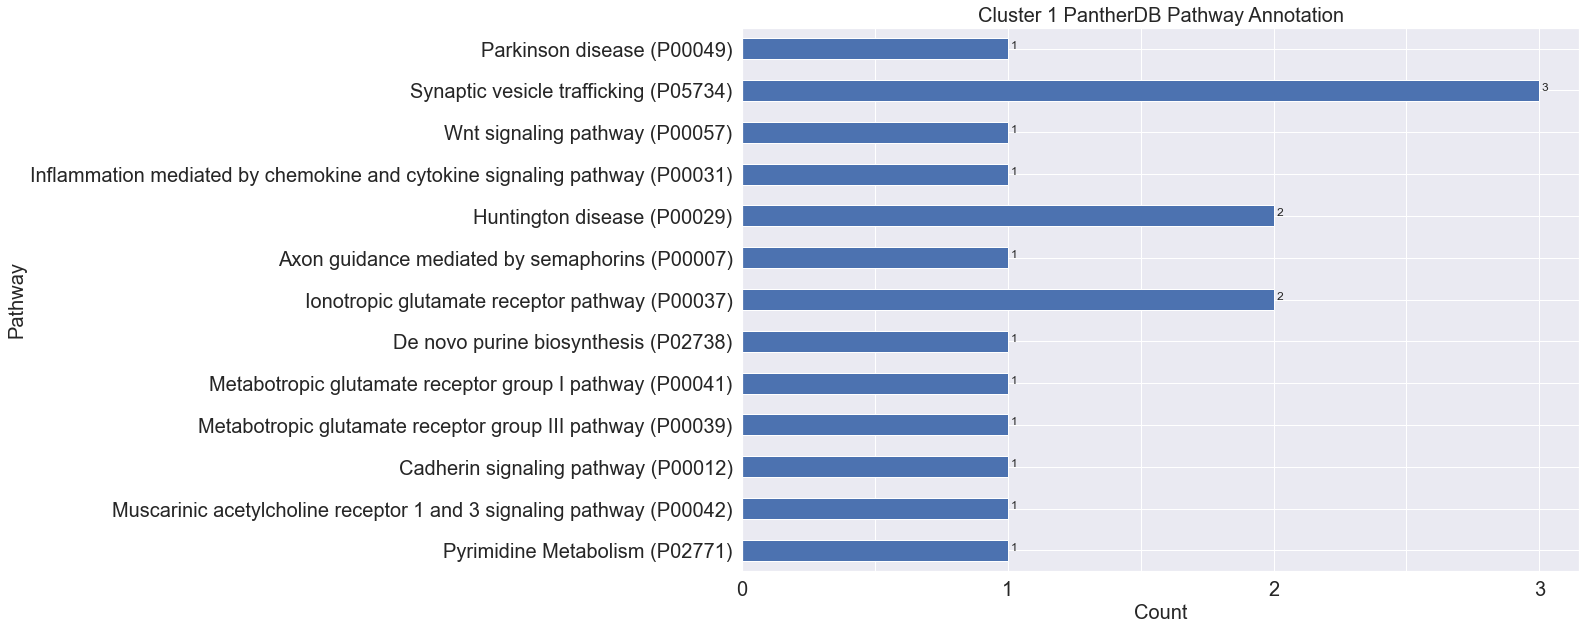

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_1 = pd.read_csv("Score_1_Cluster_1.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_1.plot.barh(x='Pathway',y='Count', legend=False)

ax.set_yticklabels(cluster_1['Pathway'], size=20)
ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 1 PantherDB Pathway Annotation", fontsize = 20)
plt.show()

<class 'numpy.ndarray'>


/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/2262807150.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(int), size = 20)


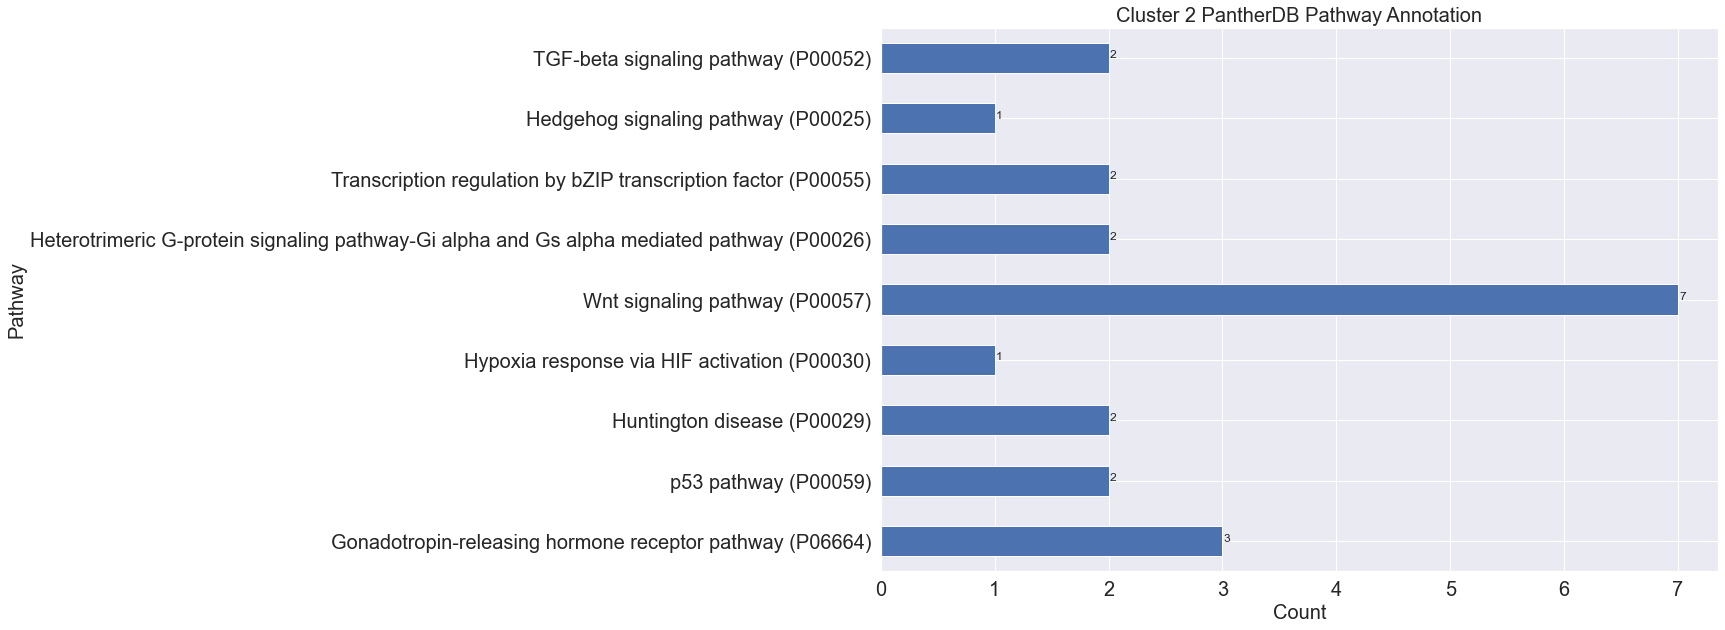

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_2 = pd.read_csv("Score_1_cluster_2.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_2.plot.barh(x='Pathway',y='Count', legend=False)

ax.set_yticklabels(cluster_2['Pathway'], size=20)
ax.set_xticklabels(ax.get_xticks().astype(int), size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 2 PantherDB Pathway Annotation", fontsize = 20)
plt.show()

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/3436852022.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)


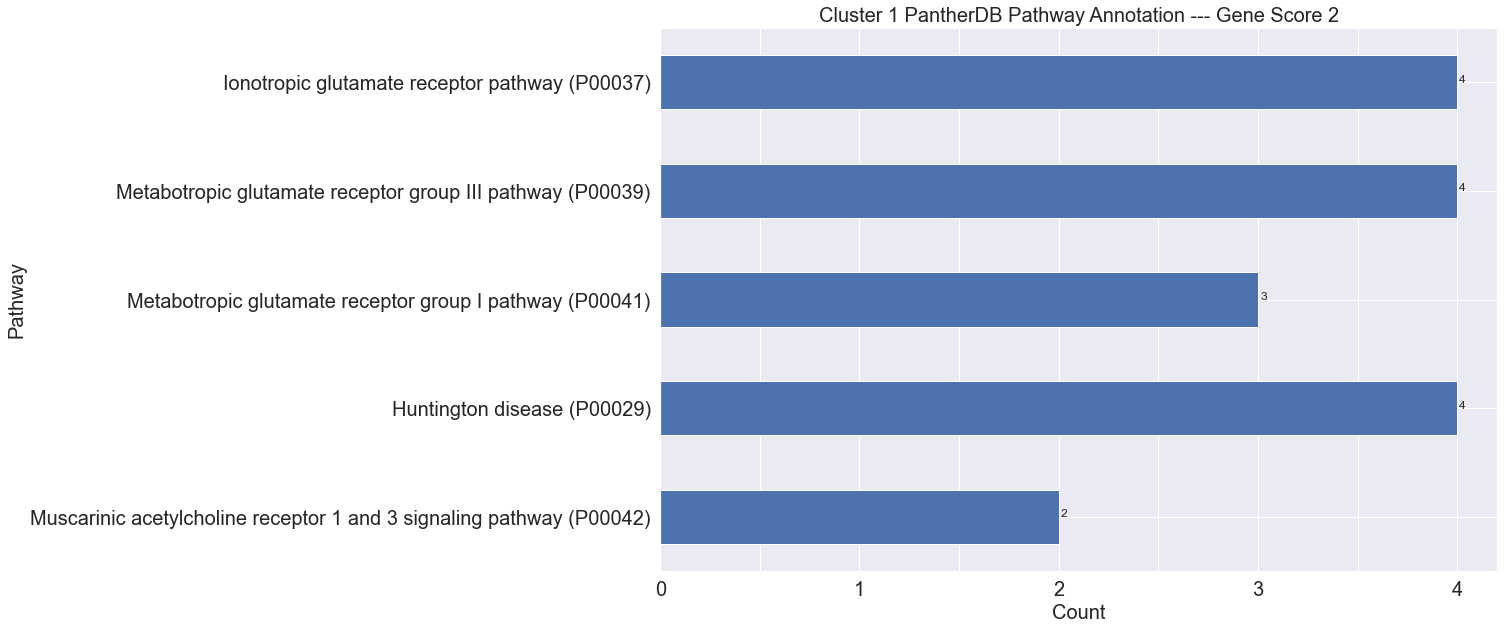

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_1 = pd.read_csv("Score_2_Cluster_1.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_1.plot.barh(x='Pathway',y='Count', legend=False)

ax.set_yticklabels(cluster_1['Pathway'], size=20)
ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 1 PantherDB Pathway Annotation --- Gene Score 2", fontsize = 20)
plt.show()

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/2683548271.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,'','','','', 1], size = 20)


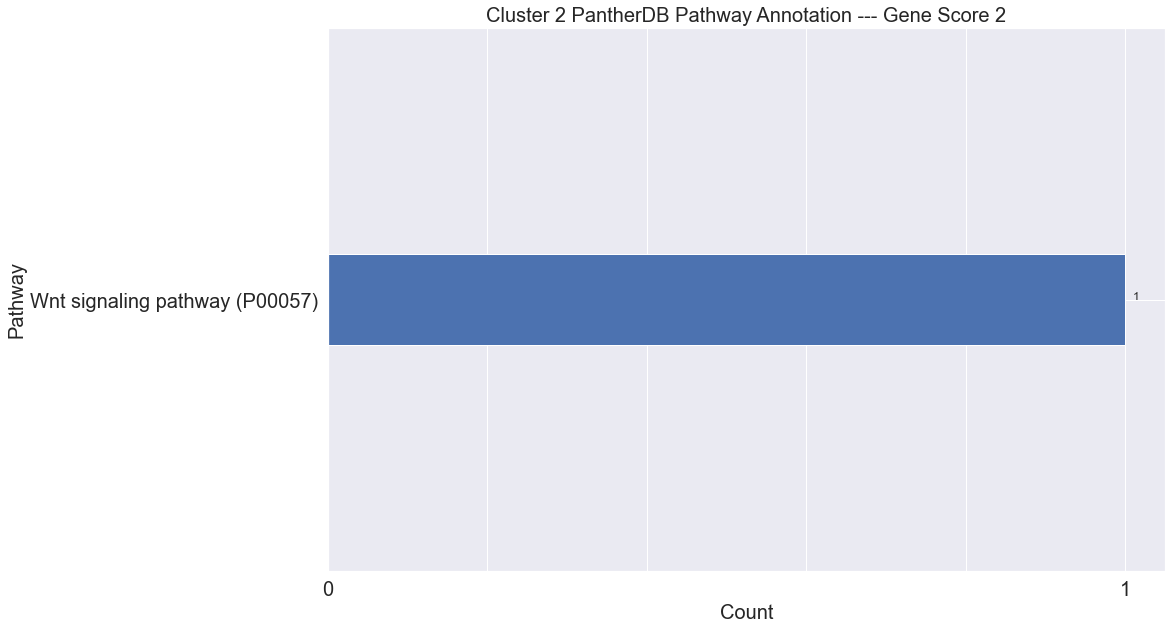

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_2 = pd.read_csv("Score_2_cluster_2.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_2.plot.barh(x='Pathway',y='Count', legend=False, width = 0.1)

ax.set_yticklabels(cluster_2['Pathway'], size=20)
ax.set_xticklabels([0,'','','','', 1], size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 2 PantherDB Pathway Annotation --- Gene Score 2", fontsize = 20)
plt.show()

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/2351462748.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)


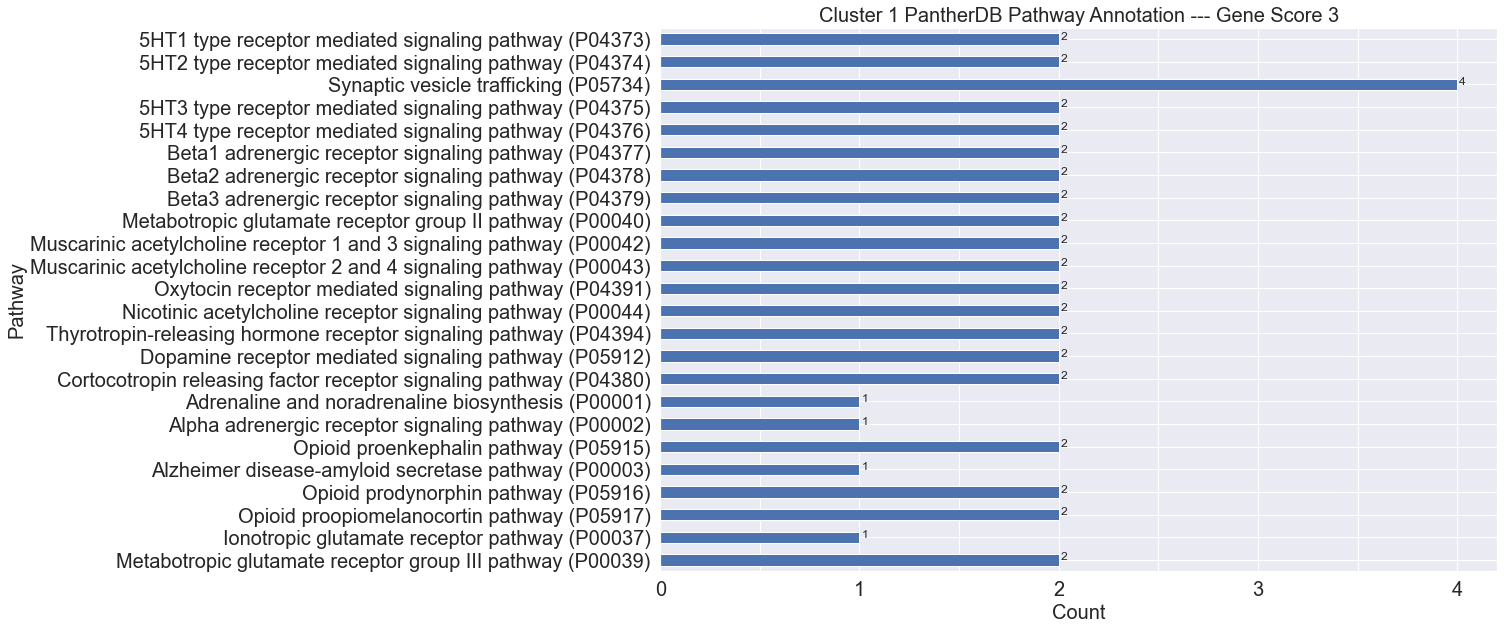

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_1 = pd.read_csv("Score_3_Cluster_1.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_1.plot.barh(x='Pathway',y='Count', legend=False)

ax.set_yticklabels(cluster_1['Pathway'], size=20)
ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 1 PantherDB Pathway Annotation --- Gene Score 3", fontsize = 20)
plt.show()

/var/folders/8l/z179r_w520v63byz3rcsbnk00000gn/T/ipykernel_1364/2526188538.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)


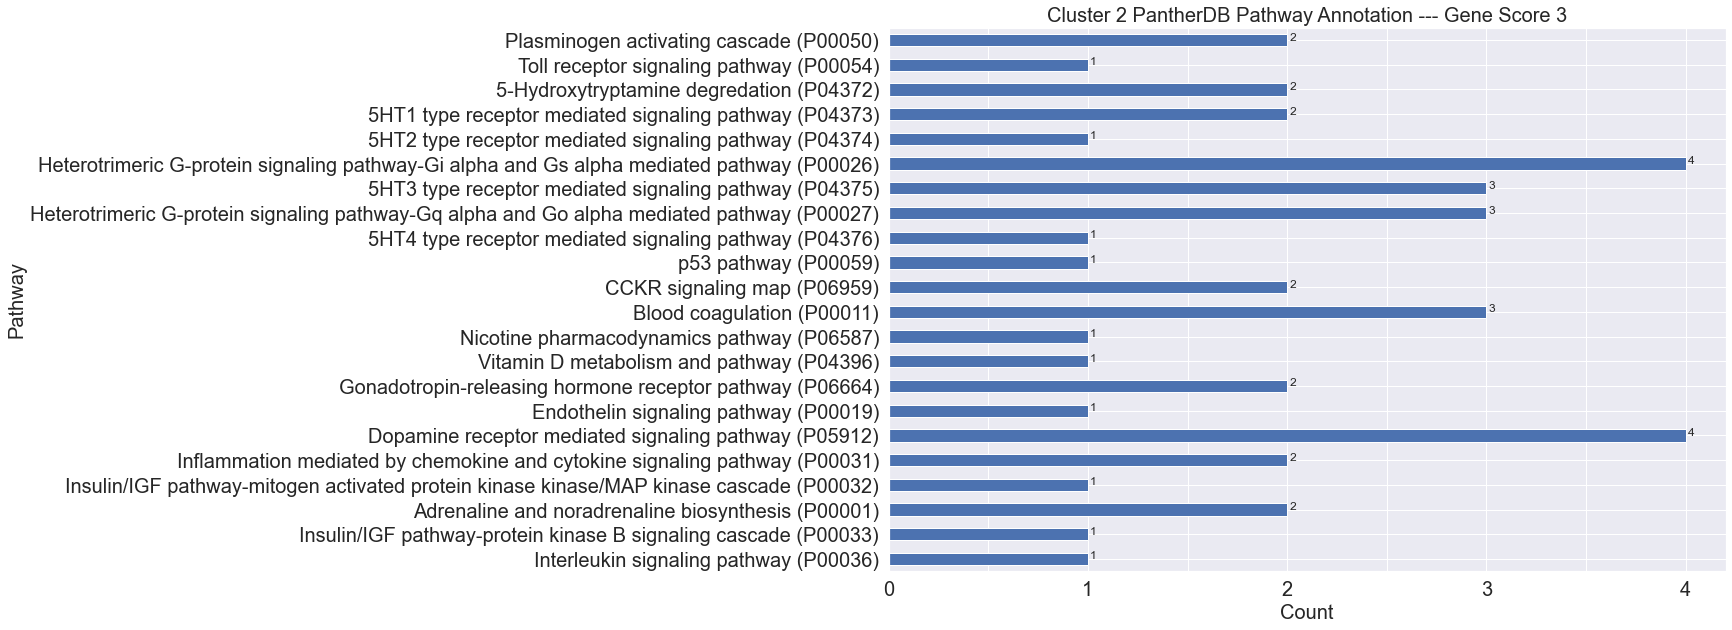

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_1 = pd.read_csv("Score_3_Cluster_2.csv", 
                  names=['index', 'Pathway', 'Count', 'Percen1', 'Percen2'])

ax = cluster_1.plot.barh(x='Pathway',y='Count', legend=False)

ax.set_yticklabels(cluster_1['Pathway'], size=20)
ax.set_xticklabels([0,'',1,'',2,'',3,'',4,'',5], size = 20)

show_values(ax)

plt.ylabel("Pathway", fontsize = 20)
plt.xlabel("Count", fontsize = 20)
plt.title("Cluster 2 PantherDB Pathway Annotation --- Gene Score 3", fontsize = 20)
plt.show()